In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
df= pd.read_csv('heart.csv')
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
#PREPARING DATA
X = df.drop("target", axis=1)
Y = df["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

array([[23, 17],
       [ 7, 14]])

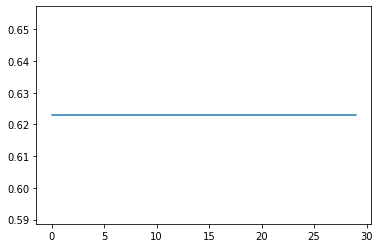

In [28]:
#KNN
scores=[]
for i in range(0,30):
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

plt.plot([i for i in range(0,30)], scores)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
confusion_matrix(y_pred, y_test)


In [29]:
#logistic reg
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print('score : ',logreg.score(x_test, y_test))
confusion_matrix(y_pred, y_test)

score :  0.7704918032786885


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[24,  8],
       [ 6, 23]])

array([[23,  8],
       [ 7, 23]])

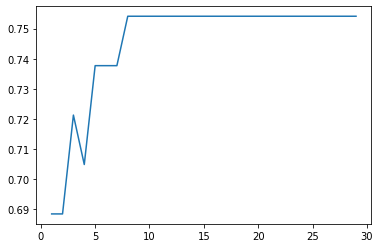

In [30]:
#dec treee
scores=[]
for i in range(1,30):
    dectree = tree.DecisionTreeClassifier( max_depth=i, random_state=123 )
    dectree.fit(x_train,y_train)
    y_pred = dectree.predict(x_test)
    scores.append(accuracy_score(y_pred, y_test))
plt.plot([i for i in range(1,30)], scores)

dectree = tree.DecisionTreeClassifier( max_depth=10, random_state=123 )
dectree.fit(x_train,y_train)

confusion_matrix(y_pred, y_test)


In [31]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_test,y_test)

0.6557377049180327

In [32]:
#VOTING CLASSIFIER
est = [('LR', logreg), ('DCT', dectree),('KNN', knn)]

vot_hard = VotingClassifier(estimators = est, voting ='soft')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
print("score : ", accuracy_score(y_test, y_pred))

score :  0.7540983606557377


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#RANDOM FOREST
rnd= RandomForestClassifier(random_state=888)
rnd.fit(x_train, y_train)
y_pred = rnd.predict(x_test)
print("score" ,rnd.score(x_test,y_test))

confusion_matrix(y_pred, y_test)



score 0.7540983606557377


array([[22,  7],
       [ 8, 24]])